# explore data

In [35]:
import pandas as pd
from sklearn.impute import SimpleImputer

file_path = '/content/drive/MyDrive/MLQL/df_file_test.csv'
data = pd.read_csv(file_path)

data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.rename(columns={'value': 'calories'}, inplace=True)

def label_activity(row):
    if row['value_distancecycling'] > 0:
        return 'Cycling'
    elif row['value_distancewalkrun'] > 0:
        return 'Running/Walking'
    else:
        return 'Relaxing'

data['activity_type'] = data.apply(label_activity, axis=1)

In [33]:
data.describe()

,Speed,calories,value_heartbeat,value_distancecycling,value_distancewalkrun,value_steps
count,4600.000000,4322.000000,4597.000000,8.700000e+02,3264.000000,173.000000
mean,1.641502,0.215555,111.990719,3.054541e-03,0.007461,536.560694
std,2.543211,0.122654,15.140009,5.638357e-03,0.031280,403.550706
min,0.000000,0.008000,73.000000,5.729820e-14,0.000055,3.000000
25%,0.876514,0.174750,102.500000,9.659584e-04,0.002991,108.000000
50%,1.302491,0.213000,108.000000,3.242996e-03,0.003364,506.000000
75%,1.530568,0.266000,119.500000,4.165718e-03,0.003768,936.000000
max,34.986221,2.860000,167.000000,1.549830e-01,0.618272,1186.000000


In [34]:
# data['value_steps'] = data['value_steps'].fillna(method='ffill')
data['value_steps'] = data['value_steps'].interpolate(method='linear')

In [27]:
data.head()

,Timestamp,Speed,calories,value_heartbeat,value_distancecycling,value_distancewalkrun,value_steps,activity_type
0,2024-02-05 14:54:30+00:00,1.640148,0.322667,123.500000,NaN,0.004820,884.0,Running/Walking
1,2024-02-05 14:54:40+00:00,1.712500,0.339000,123.666667,NaN,0.004316,NaN,Running/Walking
2,2024-02-05 14:54:50+00:00,1.634478,0.396750,124.000000,NaN,0.004186,NaN,Running/Walking
3,2024-02-05 14:55:00+00:00,1.324659,0.377000,124.666667,NaN,0.002988,NaN,Running/Walking
4,2024-02-05 14:55:10+00:00,1.459364,0.310500,124.000000,NaN,0.004114,NaN,Running/Walking


In [36]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

numeric_columns = ['Speed', 'calories', 'value_heartbeat']
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

In [21]:
data.head()

,Timestamp,Speed,calories,value_heartbeat,value_distancecycling,value_distancewalkrun,value_steps,activity_type
0,2024-02-05 14:54:30+00:00,1.640148,0.322667,123.500000,NaN,0.004820,884.0,Running/Walking
1,2024-02-05 14:54:40+00:00,1.712500,0.339000,123.666667,NaN,0.004316,886.8,Running/Walking
2,2024-02-05 14:54:50+00:00,1.634478,0.396750,124.000000,NaN,0.004186,889.6,Running/Walking
3,2024-02-05 14:55:00+00:00,1.324659,0.377000,124.666667,NaN,0.002988,892.4,Running/Walking
4,2024-02-05 14:55:10+00:00,1.459364,0.310500,124.000000,NaN,0.004114,895.2,Running/Walking


In [37]:
data['value_distancecycling'] = data['value_distancecycling'].fillna(0)
data['value_distancewalkrun'] = data['value_distancewalkrun'].fillna(0)

In [38]:
data.head()

,Timestamp,Speed,calories,value_heartbeat,value_distancecycling,value_distancewalkrun,value_steps,activity_type
0,2024-02-05 14:54:30+00:00,1.640148,0.322667,123.500000,0.0,0.004820,884.0,Running/Walking
1,2024-02-05 14:54:40+00:00,1.712500,0.339000,123.666667,0.0,0.004316,NaN,Running/Walking
2,2024-02-05 14:54:50+00:00,1.634478,0.396750,124.000000,0.0,0.004186,NaN,Running/Walking
3,2024-02-05 14:55:00+00:00,1.324659,0.377000,124.666667,0.0,0.002988,NaN,Running/Walking
4,2024-02-05 14:55:10+00:00,1.459364,0.310500,124.000000,0.0,0.004114,NaN,Running/Walking


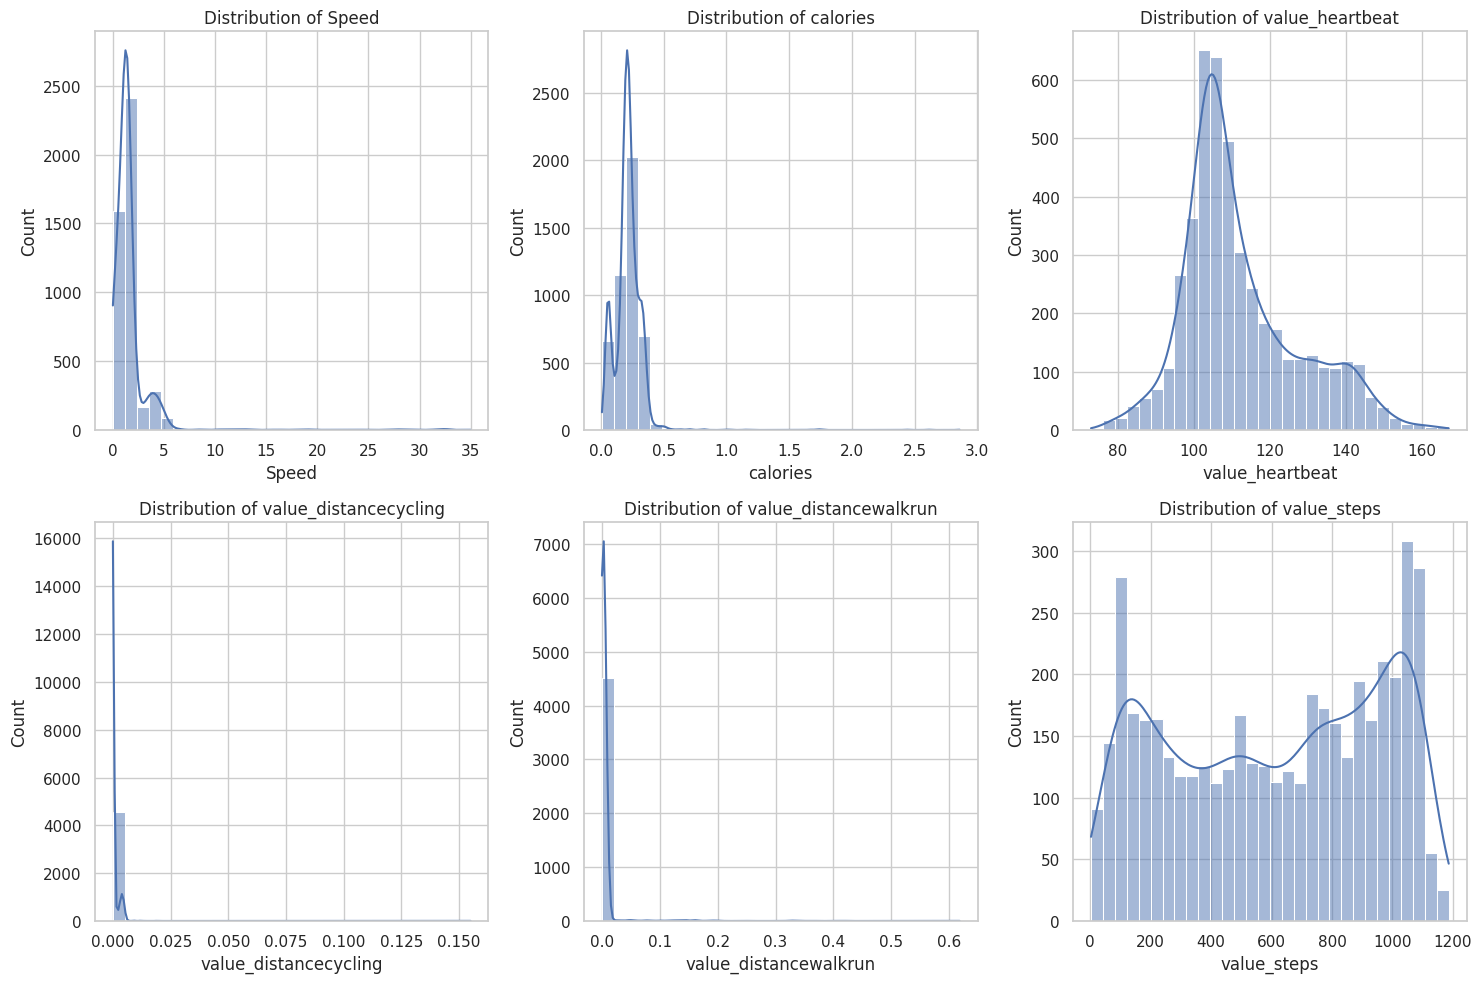

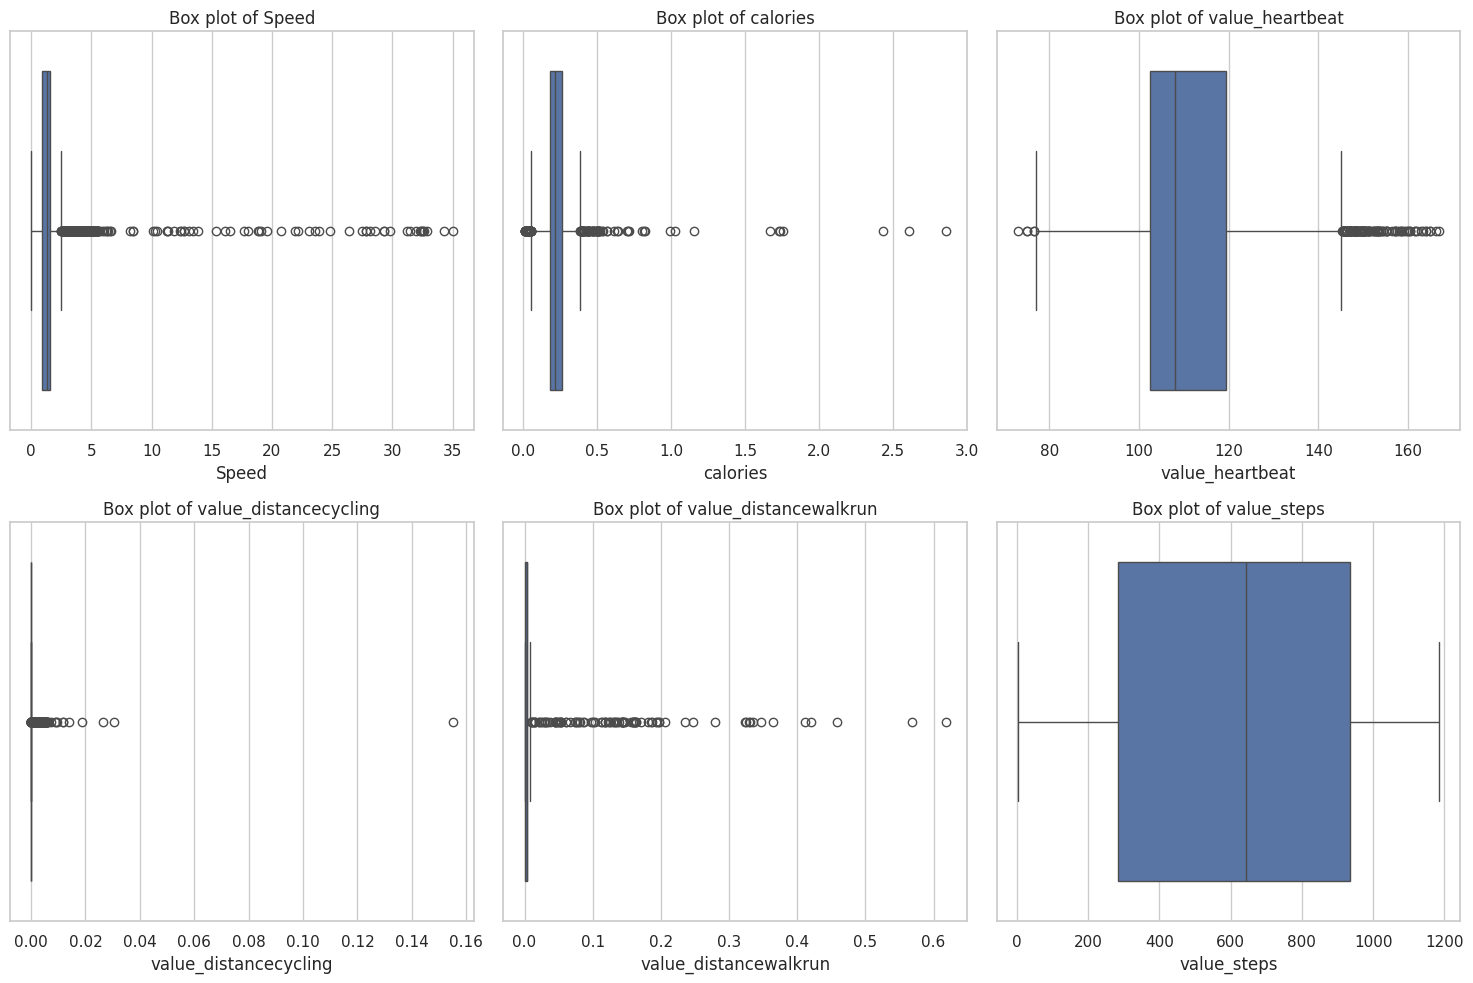

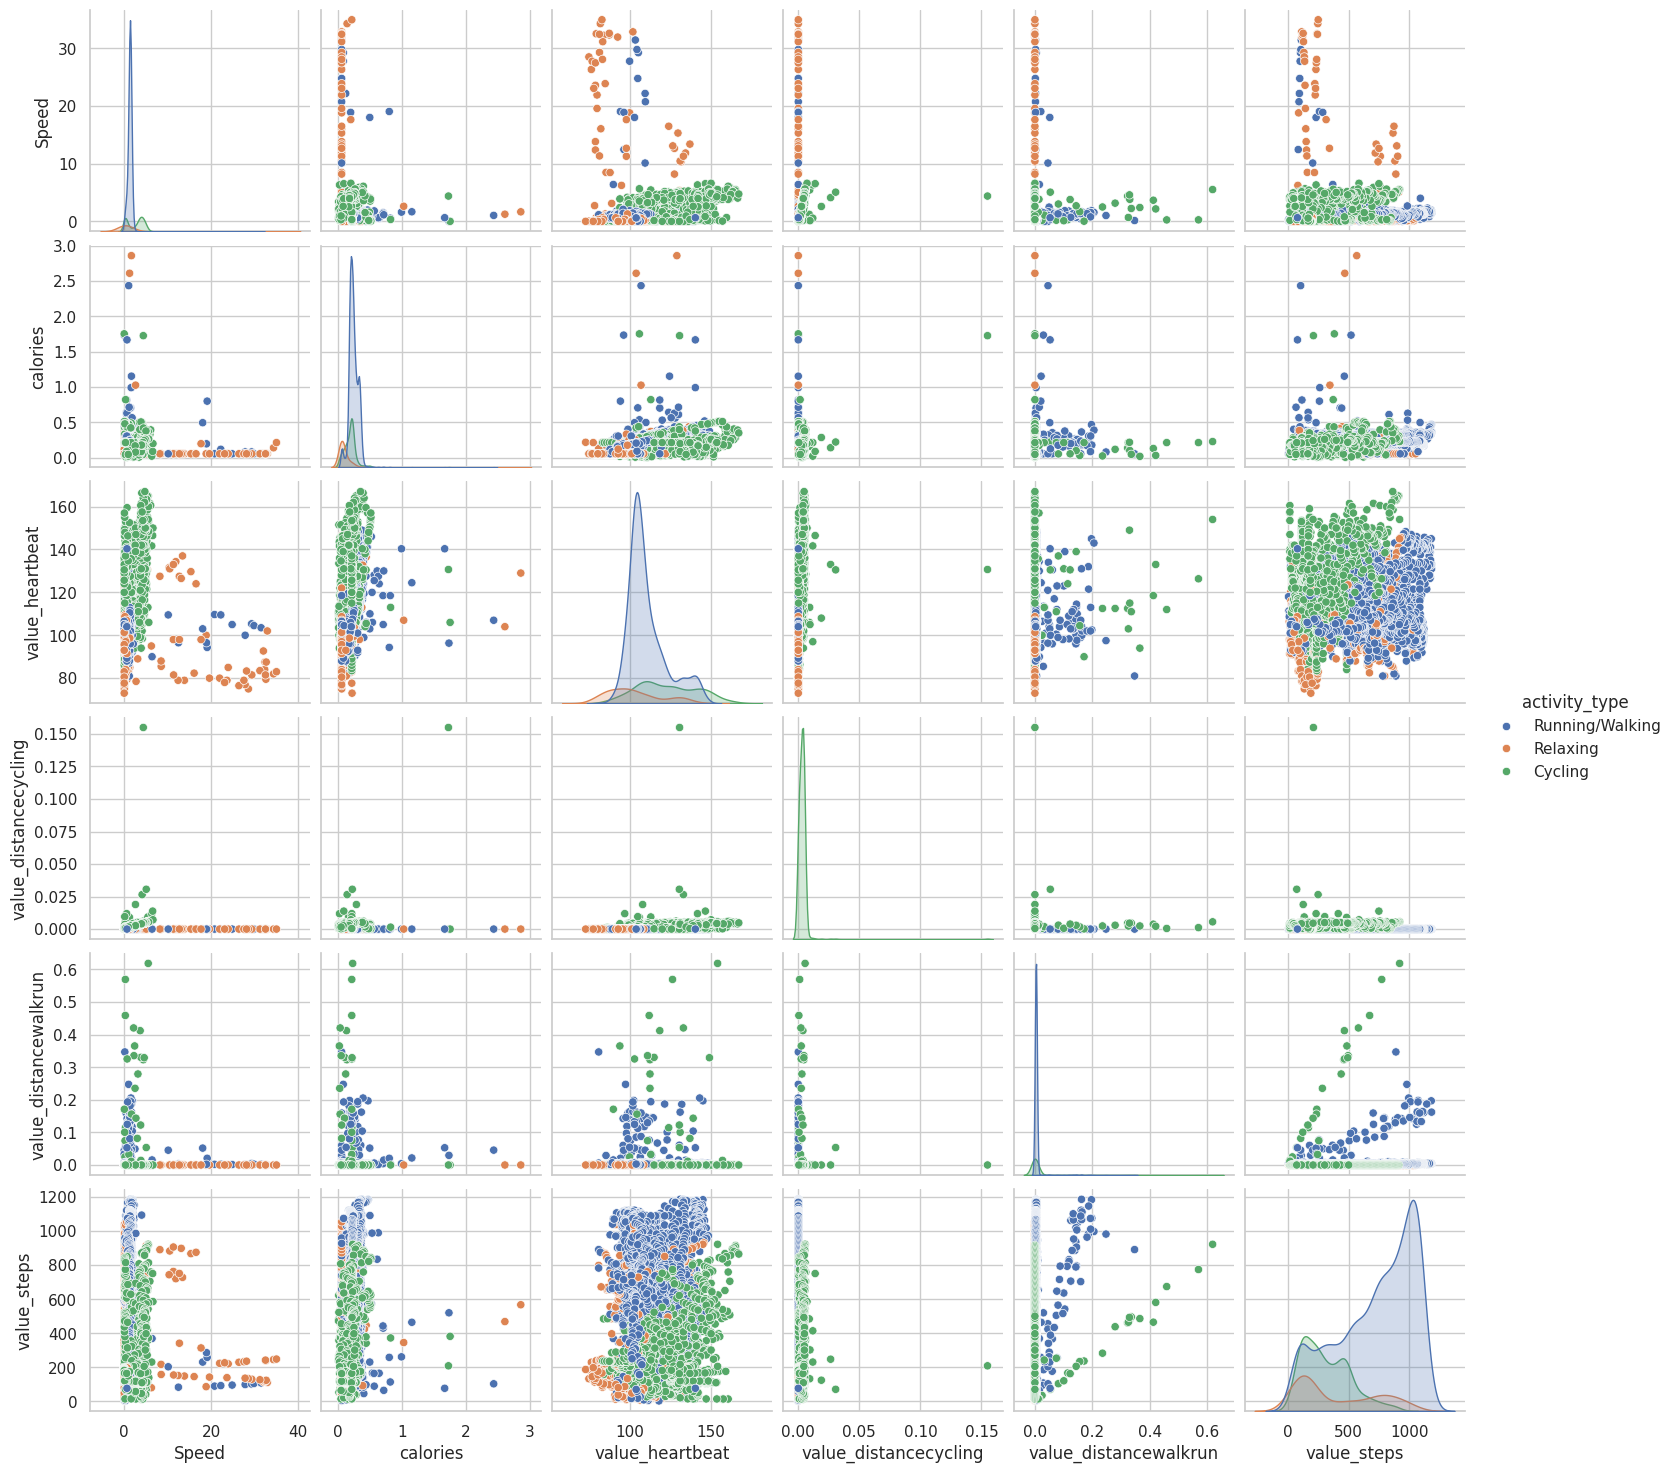

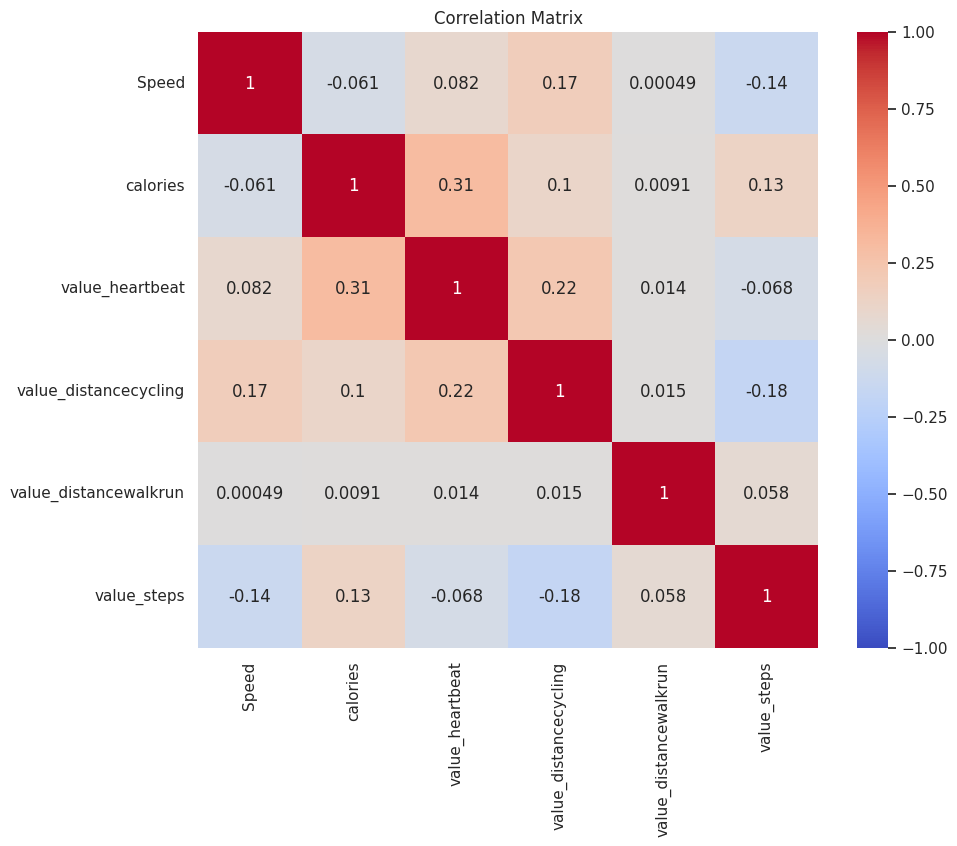

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Histograms for numerical columns
numeric_columns = ['Speed', 'calories', 'value_heartbeat', 'value_distancecycling', 'value_distancewalkrun', 'value_steps']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

# Pair plot to see relationships between variables
sns.pairplot(data[numeric_columns + ['activity_type']], hue='activity_type')
plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


# Predict steps and then impute

In [65]:
import pandas as pd
from sklearn.impute import SimpleImputer

file_path = '/content/drive/MyDrive/MLQL/df_file_test.csv'
data = pd.read_csv(file_path)

data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.rename(columns={'value': 'calories'}, inplace=True)

def label_activity(row):
    if row['value_distancecycling'] > 0:
        return 'Cycling'
    elif row['value_distancewalkrun'] > 0:
        return 'Running/Walking'
    else:
        return 'Relaxing'

data['activity_type'] = data.apply(label_activity, axis=1)

In [66]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

numeric_columns = ['Speed', 'calories', 'value_heartbeat']
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

data['value_distancecycling'] = data['value_distancecycling'].fillna(0)
data['value_distancewalkrun'] = data['value_distancewalkrun'].fillna(0)

In [67]:
data.head()

,Timestamp,Speed,calories,value_heartbeat,value_distancecycling,value_distancewalkrun,value_steps,activity_type
0,2024-02-05 14:54:30+00:00,1.640148,0.322667,123.500000,0.0,0.004820,884.0,Running/Walking
1,2024-02-05 14:54:40+00:00,1.712500,0.339000,123.666667,0.0,0.004316,NaN,Running/Walking
2,2024-02-05 14:54:50+00:00,1.634478,0.396750,124.000000,0.0,0.004186,NaN,Running/Walking
3,2024-02-05 14:55:00+00:00,1.324659,0.377000,124.666667,0.0,0.002988,NaN,Running/Walking
4,2024-02-05 14:55:10+00:00,1.459364,0.310500,124.000000,0.0,0.004114,NaN,Running/Walking


In [68]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

known_steps = data.dropna(subset=['value_steps'])
missing_steps = data[data['value_steps'].isna()]

# Define features and target for regression
features = ['Speed', 'calories', 'value_heartbeat', 'value_distancecycling', 'value_distancewalkrun']
X = known_steps[features]
y = known_steps['value_steps']

# Split the known steps data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a regression model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Predict on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error (MSE): {mse}")
# print(f"Mean Absolute Error (MAE): {mae}")
# print(f"R-squared (R2): {r2}")

# # Predict missing steps
# X_missing = missing_steps[features]
# missing_steps['value_steps'] = model.predict(X_missing)

# # Combine the data back together
# filled_data = pd.concat([known_steps, missing_steps])

# # Impute any remaining missing values if necessary (though ideally there should be none)
# filled_data['value_steps'] = filled_data['value_steps'].fillna(method='ffill')
# filled_data['value_steps'] = filled_data['value_steps'].fillna(method='bfill')
# filled_data['value_steps'] = filled_data['value_steps'].interpolate(method='linear')

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest - R-squared (R2): {r2_rf}")

# Optionally, use cross-validation to get a more robust estimate of the model's performance
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validated R-squared: {cv_scores.mean()}")

# Now predict missing steps and impute them
X_missing = missing_steps[features]
missing_steps['value_steps'] = rf_model.predict(X_missing)

# # Combine the data back together
# filled_data = pd.concat([known_steps, missing_steps])

Random Forest - Mean Squared Error (MSE): 54514.97090071428
Random Forest - Mean Absolute Error (MAE): 185.189
Random Forest - R-squared (R2): 0.6790417142632058
Cross-Validated R-squared: 0.2138613135446056


<ipython-input-69-72dbe544f38d>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_steps['value_steps'] = rf_model.predict(X_missing)


In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated R-squared: {best_score}")

best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

y_pred_best_rf = best_rf_model.predict(X_test)

mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Random Forest - Mean Squared Error (MSE): {mse_best_rf}")
print(f"Best Random Forest - Mean Absolute Error (MAE): {mae_best_rf}")
print(f"Best Random Forest - R-squared (R2): {r2_best_rf}")

X_missing = missing_steps[features]
missing_steps.loc[:, 'value_steps'] = best_rf_model.predict(X_missing)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Cross-Validated R-squared: 0.44203334821220974
Best Random Forest - Mean Squared Error (MSE): 63157.73721181243
Best Random Forest - Mean Absolute Error (MAE): 205.71212492345424
Best Random Forest - R-squared (R2): 0.6281572065142081


In [71]:
filled_data = pd.concat([known_steps, missing_steps])
# filled_data['value_steps'] = filled_data['value_steps'].fillna(method='ffill')
# filled_data['value_steps'] = filled_data['value_steps'].fillna(method='bfill')
filled_data['value_steps'] = filled_data['value_steps'].interpolate(method='linear')

In [63]:
filled_data.head()

,Timestamp,Speed,calories,value_heartbeat,value_distancecycling,value_distancewalkrun,value_steps,activity_type
0,2024-02-05 14:54:30+00:00,1.640148,0.322667,123.5,0.0,0.004820,884.0,Running/Walking
35,2024-02-05 15:00:20+00:00,1.011684,0.082500,97.5,0.0,0.247335,982.0,Running/Walking
60,2024-02-05 15:04:30+00:00,1.453520,0.305333,115.0,0.0,0.003753,590.0,Running/Walking
161,2024-02-10 08:58:20+00:00,0.414285,0.057000,102.5,0.0,0.004014,199.0,Running/Walking
162,2024-02-10 08:58:30+00:00,0.372410,0.057000,96.0,0.0,0.060182,177.0,Running/Walking


In [76]:
filled_data.describe()

,Speed,calories,value_heartbeat,value_distancecycling,value_distancewalkrun,value_steps
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,1.641502,0.215555,111.990719,0.000578,0.005294,466.302032
std,2.543211,0.118889,15.135070,0.002727,0.026565,252.179697
min,0.000000,0.008000,73.000000,0.000000,0.000000,3.000000
25%,0.876514,0.178000,102.500000,0.000000,0.000000,233.981267
50%,1.302491,0.215555,108.000000,0.000000,0.003073,518.286719
75%,1.530568,0.260850,119.500000,0.000000,0.003575,681.727611
max,34.986221,2.860000,167.000000,0.154983,0.618272,1186.000000


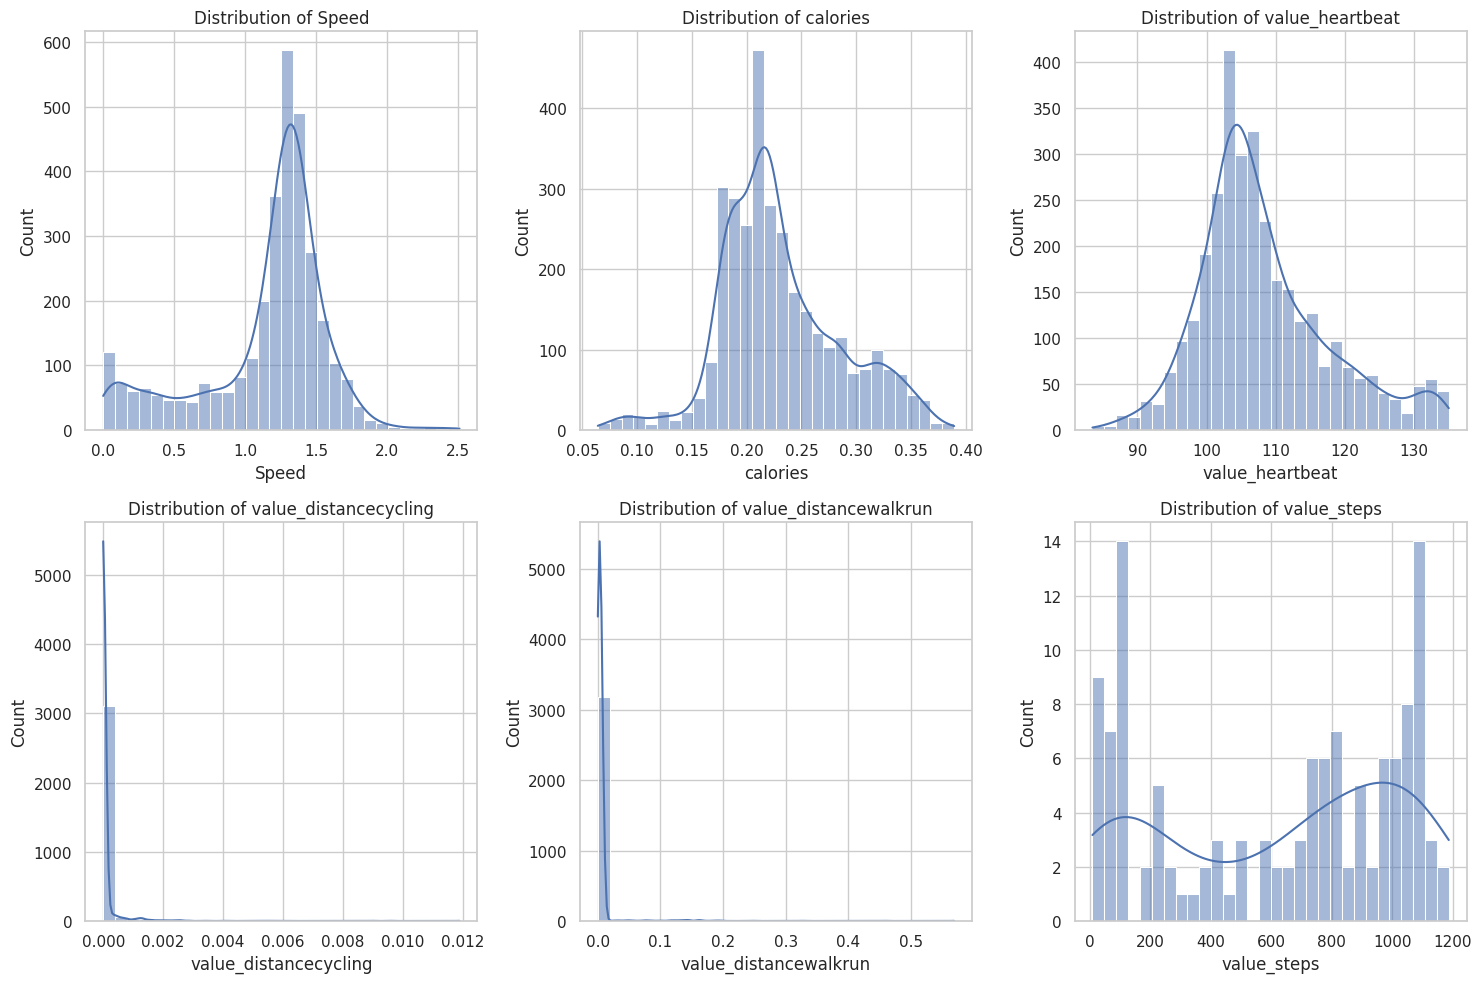

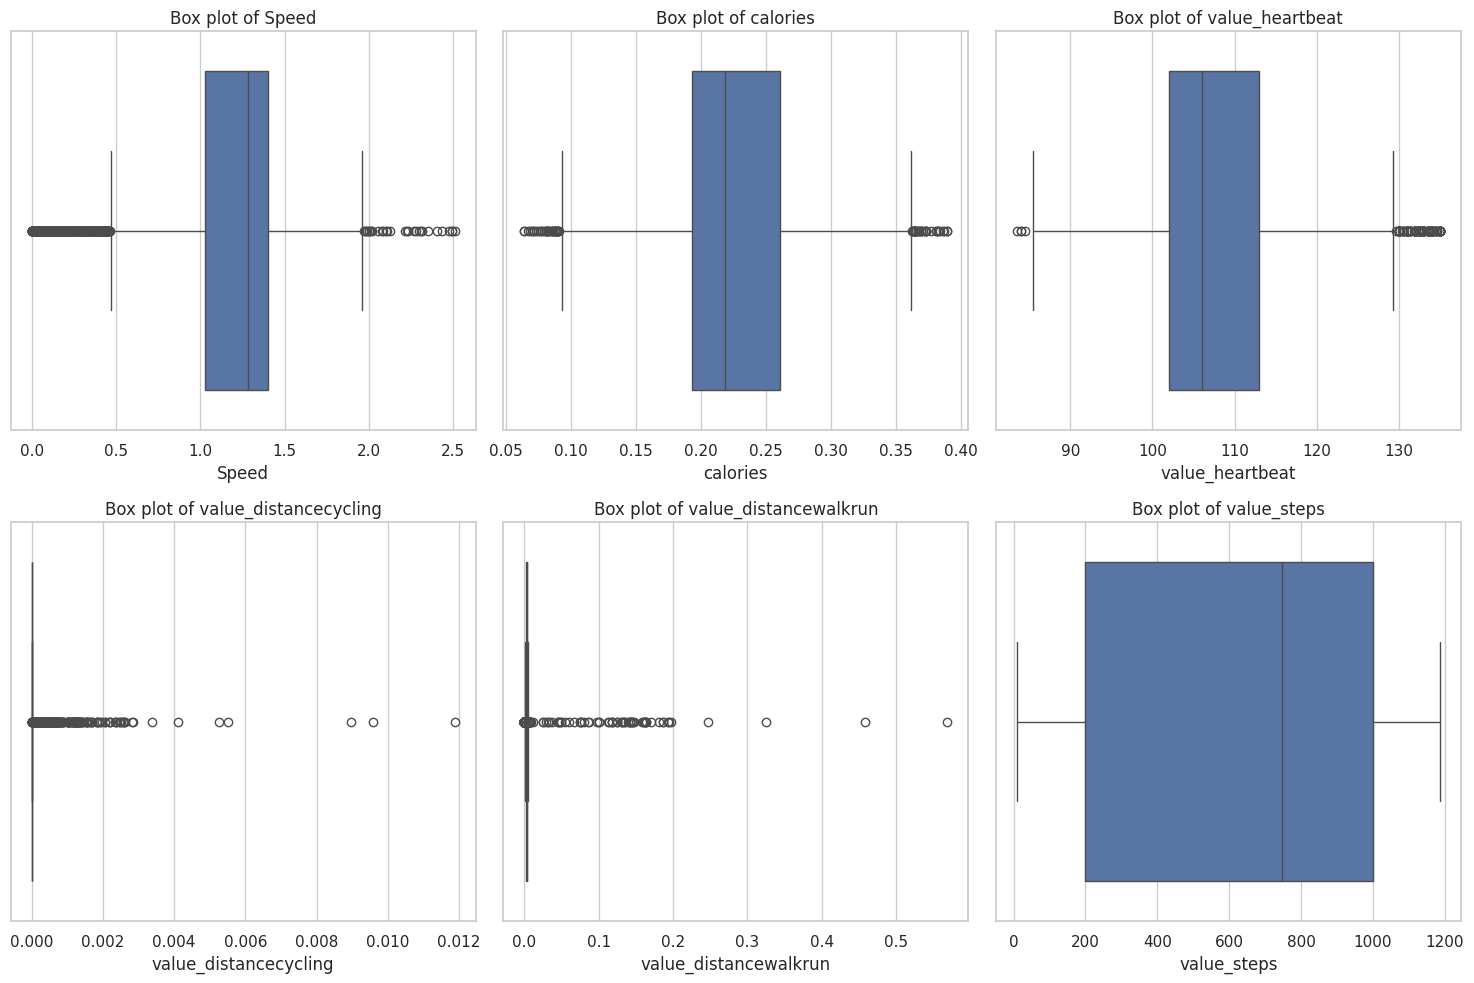

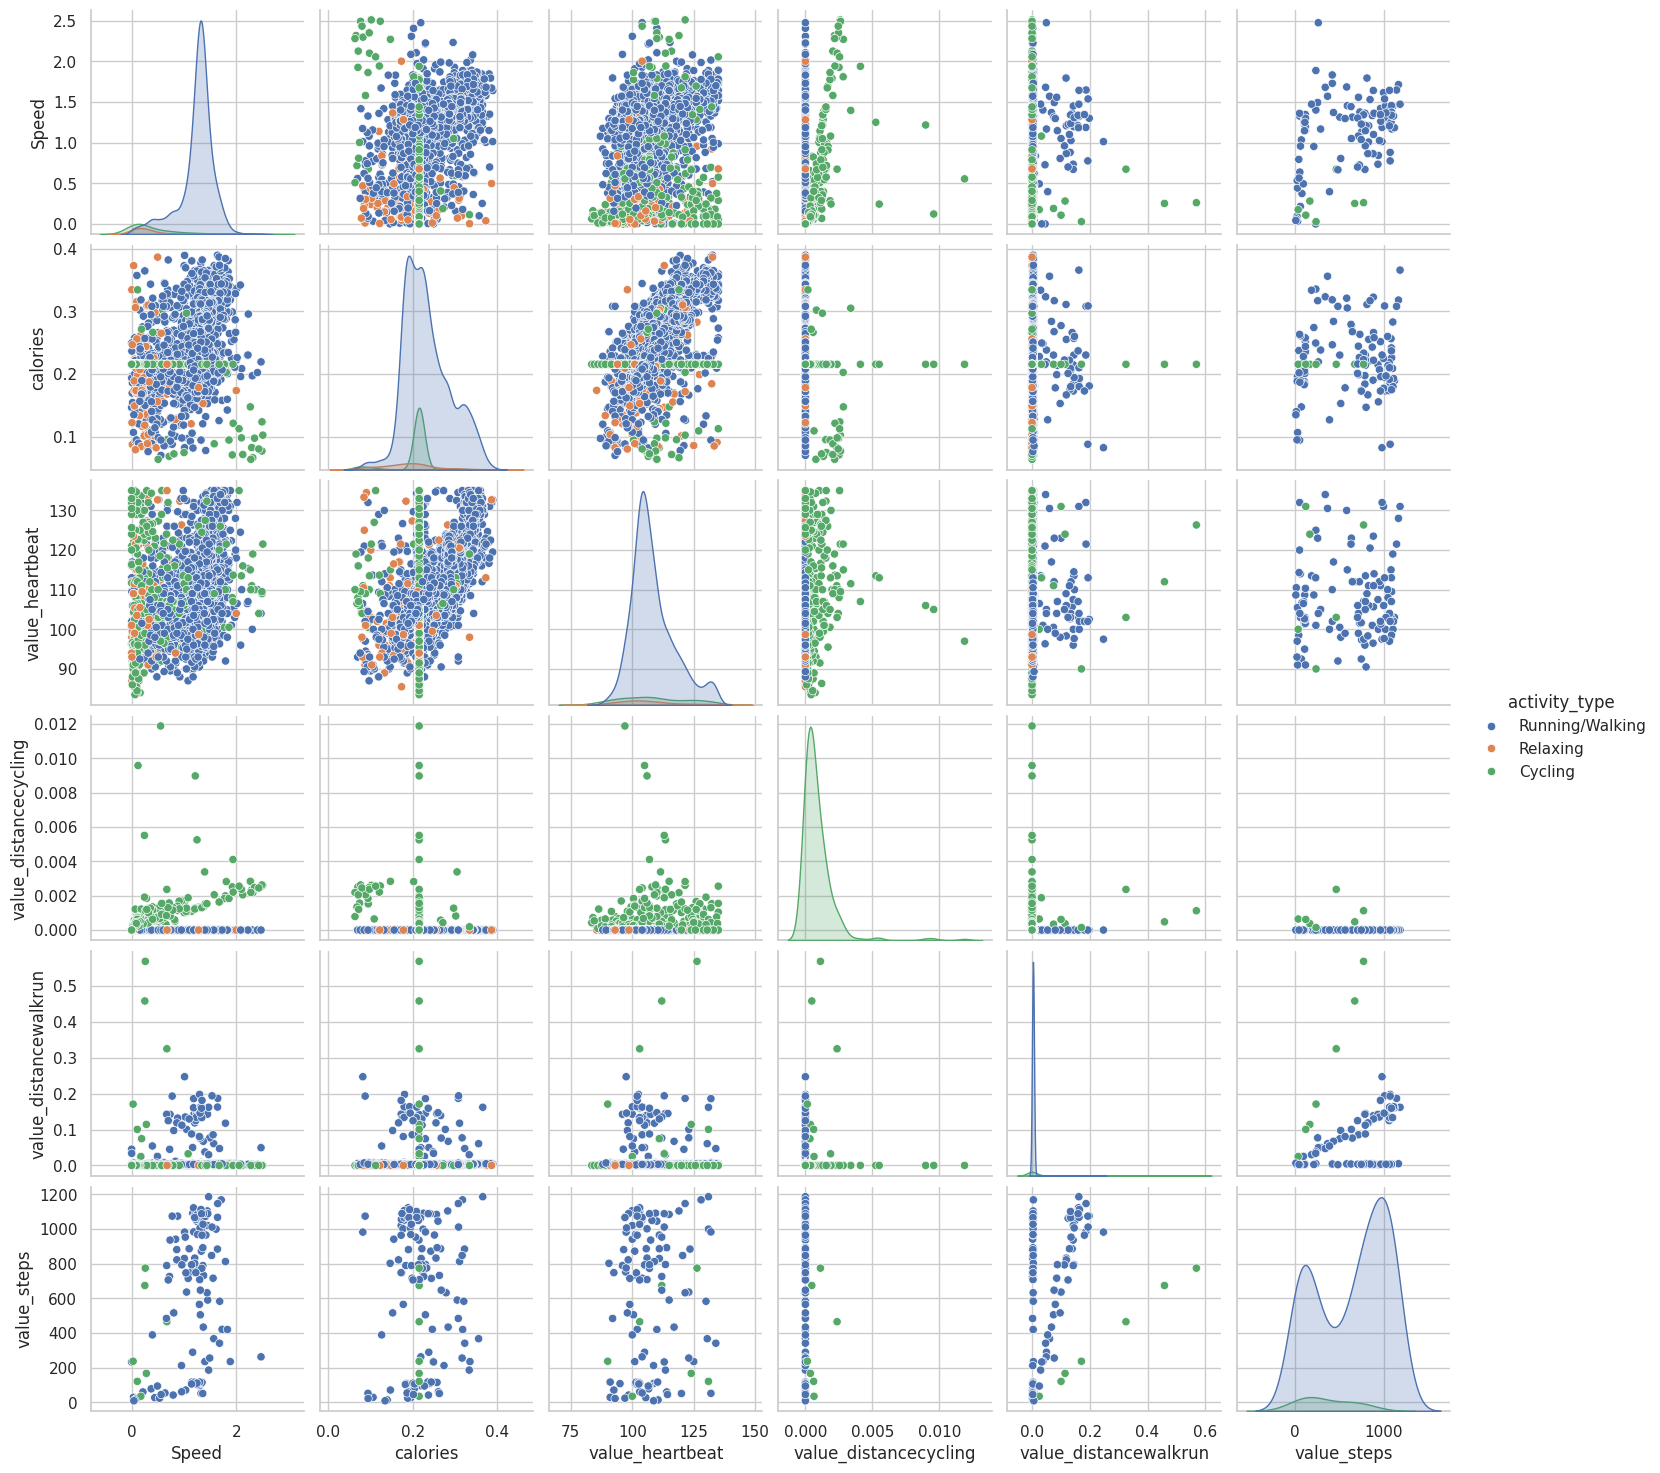

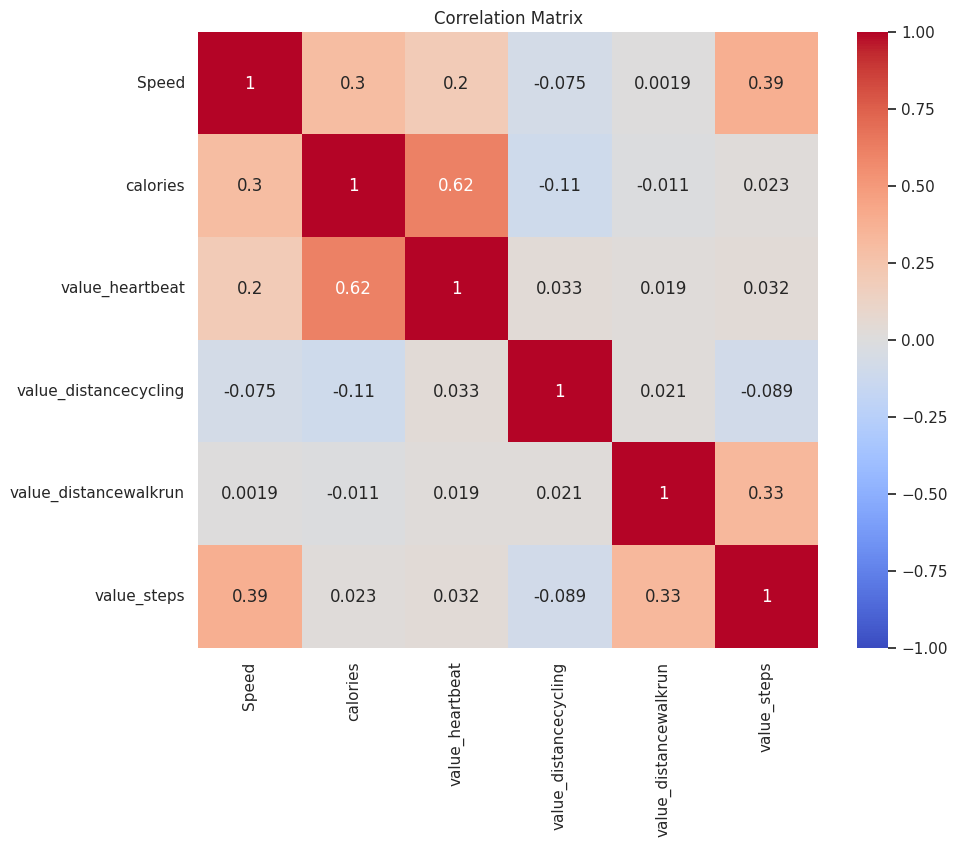

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Histograms for numerical columns
numeric_columns = ['Speed', 'calories', 'value_heartbeat', 'value_distancecycling', 'value_distancewalkrun', 'value_steps']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

# Pair plot to see relationships between variables
sns.pairplot(data[numeric_columns + ['activity_type']], hue='activity_type')
plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
